In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from PIL import Image


import google.colab.drive
mount = google.colab.drive.mount('/content/drive')


Mounted at /content/drive


# pseudo

WHILE
    images un processed
    show image face one by one

    prompt user for a custom label of 1 - 7 (1 being angry, disgust, fear, happy, neutral, surprise, sad)

    add the face
    
    and the label at the same time so labels persist

In [ ]:
!ls drive/MyDrive/Experiment_With_Code/AI/unlisted_addition_V3/unlisted.zip

drive/MyDrive/Experiment_With_Code/AI/unlisted_addition_V3/unlisted.zip


In [ ]:
# New Images
!unzip drive/MyDrive/Experiment_With_Code/AI/unlisted_addition_V3/unlisted.zip

Archive:  drive/MyDrive/Experiment_With_Code/AI/unlisted_addition_V3/unlisted.zip
   creating: unlisted/
  inflating: unlisted/IMG_5144.JPG   
  inflating: __MACOSX/unlisted/._IMG_5144.JPG  
  inflating: unlisted/IMG_6468 2.psd.jpg  
  inflating: __MACOSX/unlisted/._IMG_6468 2.psd.jpg  
  inflating: unlisted/IMG_6777.psd.jpg  
  inflating: __MACOSX/unlisted/._IMG_6777.psd.jpg  
  inflating: unlisted/IMG_6793.psd.jpg  
  inflating: __MACOSX/unlisted/._IMG_6793.psd.jpg  
  inflating: unlisted/IMG_5145.JPG   
  inflating: __MACOSX/unlisted/._IMG_5145.JPG  
  inflating: unlisted/IMG_1240.JPG   
  inflating: __MACOSX/unlisted/._IMG_1240.JPG  
  inflating: unlisted/48a30dd7-5d4d-4e75-ad72-f5ec1089ba01.JPG  
  inflating: __MACOSX/unlisted/._48a30dd7-5d4d-4e75-ad72-f5ec1089ba01.JPG  
  inflating: unlisted/IMG_4089.JPG   
  inflating: __MACOSX/unlisted/._IMG_4089.JPG  
  inflating: unlisted/IMG_1310.psd.jpg  
  inflating: __MACOSX/unlisted/._IMG_1310.psd.jpg  
  inflating: unlisted/.DS_Store   

In [ ]:
# Face Detection
!unzip drive/MyDrive/Experiment_With_Code/AI/augment_data/face_detection.zip

Archive:  drive/MyDrive/Experiment_With_Code/AI/augment_data/face_detection.zip
   creating: face_detection/
  inflating: face_detection/deploy.prototxt  
   creating: face_detection/examples/
  inflating: face_detection/examples/example1.jpg  
  inflating: face_detection/examples/example2.jpg  
  inflating: face_detection/examples/example3.jpg  
  inflating: face_detection/examples/keelan_happy_daydreamer.jpg  
  inflating: face_detection/examples/keelan_surprised.jpg  
  inflating: face_detection/haarcascade_frontalface_default.xml  
  inflating: face_detection/res10_300x300_ssd_iter_140000.caffemodel  
  inflating: face_detection/yunet.onnx  


In [ ]:
# setup
unlisted = 'unlisted'

images = []
labels = []

# Setup
index = 0  # Change this to step through images

In [ ]:
# Face Detection
def process_faces_with_image(detections, frame, faces, resize):
    print("calling process with faces...")
    (h, w) = frame.shape[:2]
    if len(detections.shape) > 2:
        for i in range(detections.shape[2]):
            confidence = detections[0,0,i,2]

            # filter face detections by confidence
            if confidence > 0.5:
                #get box coords
                box = detections[0, 0, i, 3:7] * [w,h,w,h]
                (x, y, x2, y2) = box.astype("int")

                # Ensure bounding box coordinates are within frame bounds
                x, y, x2, y2 = max(0, x), max(0, y), min(w, x2), min(h, y2)

                # Crop and resize the face
                face = frame[y:y2, x:x2]
                focused_face = cv.resize(face, (resize, resize), interpolation=cv.INTER_AREA)
                focused_face = cv.cvtColor(focused_face, cv.COLOR_BGR2RGB)

                # Append the processed face to the images list
                return focused_face

def res10_face_detection(img):
    model_path = 'face_detection/res10_300x300_ssd_iter_140000.caffemodel'
    prototxt_path = 'face_detection/deploy.prototxt'
    # faces array
    faces = []

    # Load the Caffe model
    net = cv.dnn.readNetFromCaffe(prototxt_path, model_path)

    # Get frame dimensions
    (h, w) = img.shape[:2]

    # Prepare input blob (using the original BGR image)
    blob = cv.dnn.blobFromImage(img, 1.0, (300, 300), (104.0, 177.0, 123.0))
    net.setInput(blob)
    detections = net.forward()

    # Count faces and detect facial dimensions
    face_count = 0
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]

        # Filter detections by confidence (default threshold: 0.5)
        if confidence > 0.5:
            face_count += 1
            box = detections[0, 0, i, 3:7] * [w, h, w, h]
            (x, y, x2, y2) = box.astype("int")

    return process_faces_with_image(detections, img, faces, resize=224)


In [ ]:
# Resnet Pipeline. Put faces into array of unlisted images
unlisted_faces = []

for img in os.listdir(unlisted):
    img_path = os.path.join(unlisted, img)


    image = cv.imread(img_path)
    if image is not None:
        image = np.array(image)
    else:
        print(f"Warning: Unable to read image {img_path}")
        continue  # Skip this file



    # Face Detection Pipeline
    face = res10_face_detection(image)


    unlisted_faces.append(face)


calling process with faces...
calling process with faces...
calling process with faces...
calling process with faces...
calling process with faces...
calling process with faces...
calling process with faces...
calling process with faces...
calling process with faces...
calling process with faces...
calling process with faces...
calling process with faces...
calling process with faces...
calling process with faces...
calling process with faces...
calling process with faces...
calling process with faces...
calling process with faces...
calling process with faces...
calling process with faces...
calling process with faces...
calling process with faces...
calling process with faces...
calling process with faces...
calling process with faces...
calling process with faces...
calling process with faces...
calling process with faces...
calling process with faces...
calling process with faces...
calling process with faces...
calling process with faces...
calling process with faces...
calling pr

In [ ]:
# Skip index if image doesn't render
index +=1

In [ ]:
# unlisted_images = os.listdir(unlisted)
# img_path = os.path.join(unlisted, unlisted_images[index])
# image = cv.imread(img_path)
# image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

image = unlisted_faces[index]
# image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Show image
plt.imshow(image)
plt.axis('off')
plt.title(f"Image {index}")
plt.show()

image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

IndexError: list index out of range

In [ ]:
# Input label manually in a separate cell after viewing image

print(f'Current Image is: Image {index}')
label = int(input('Labels are 0(angry) 1(disgust) 2(fear) 3(happy) 4(neutral) 5(sad) 6(surprise) 7(ignore)\nEnter label: '))

if label == 7:
    print("Skipping image...")
    print("Next image index:", (index+1))
else:
  images.append(image_rgb)  # Use the variable from previous cell
  labels.append(label)

# Optional: move to next index manually or via a loop later
index += 1


Current Image is: Image 74
Labels are 0(angry) 1(disgust) 2(fear) 3(happy) 4(neutral) 5(sad) 6(surprise) 7(ignore)
Enter label: 3


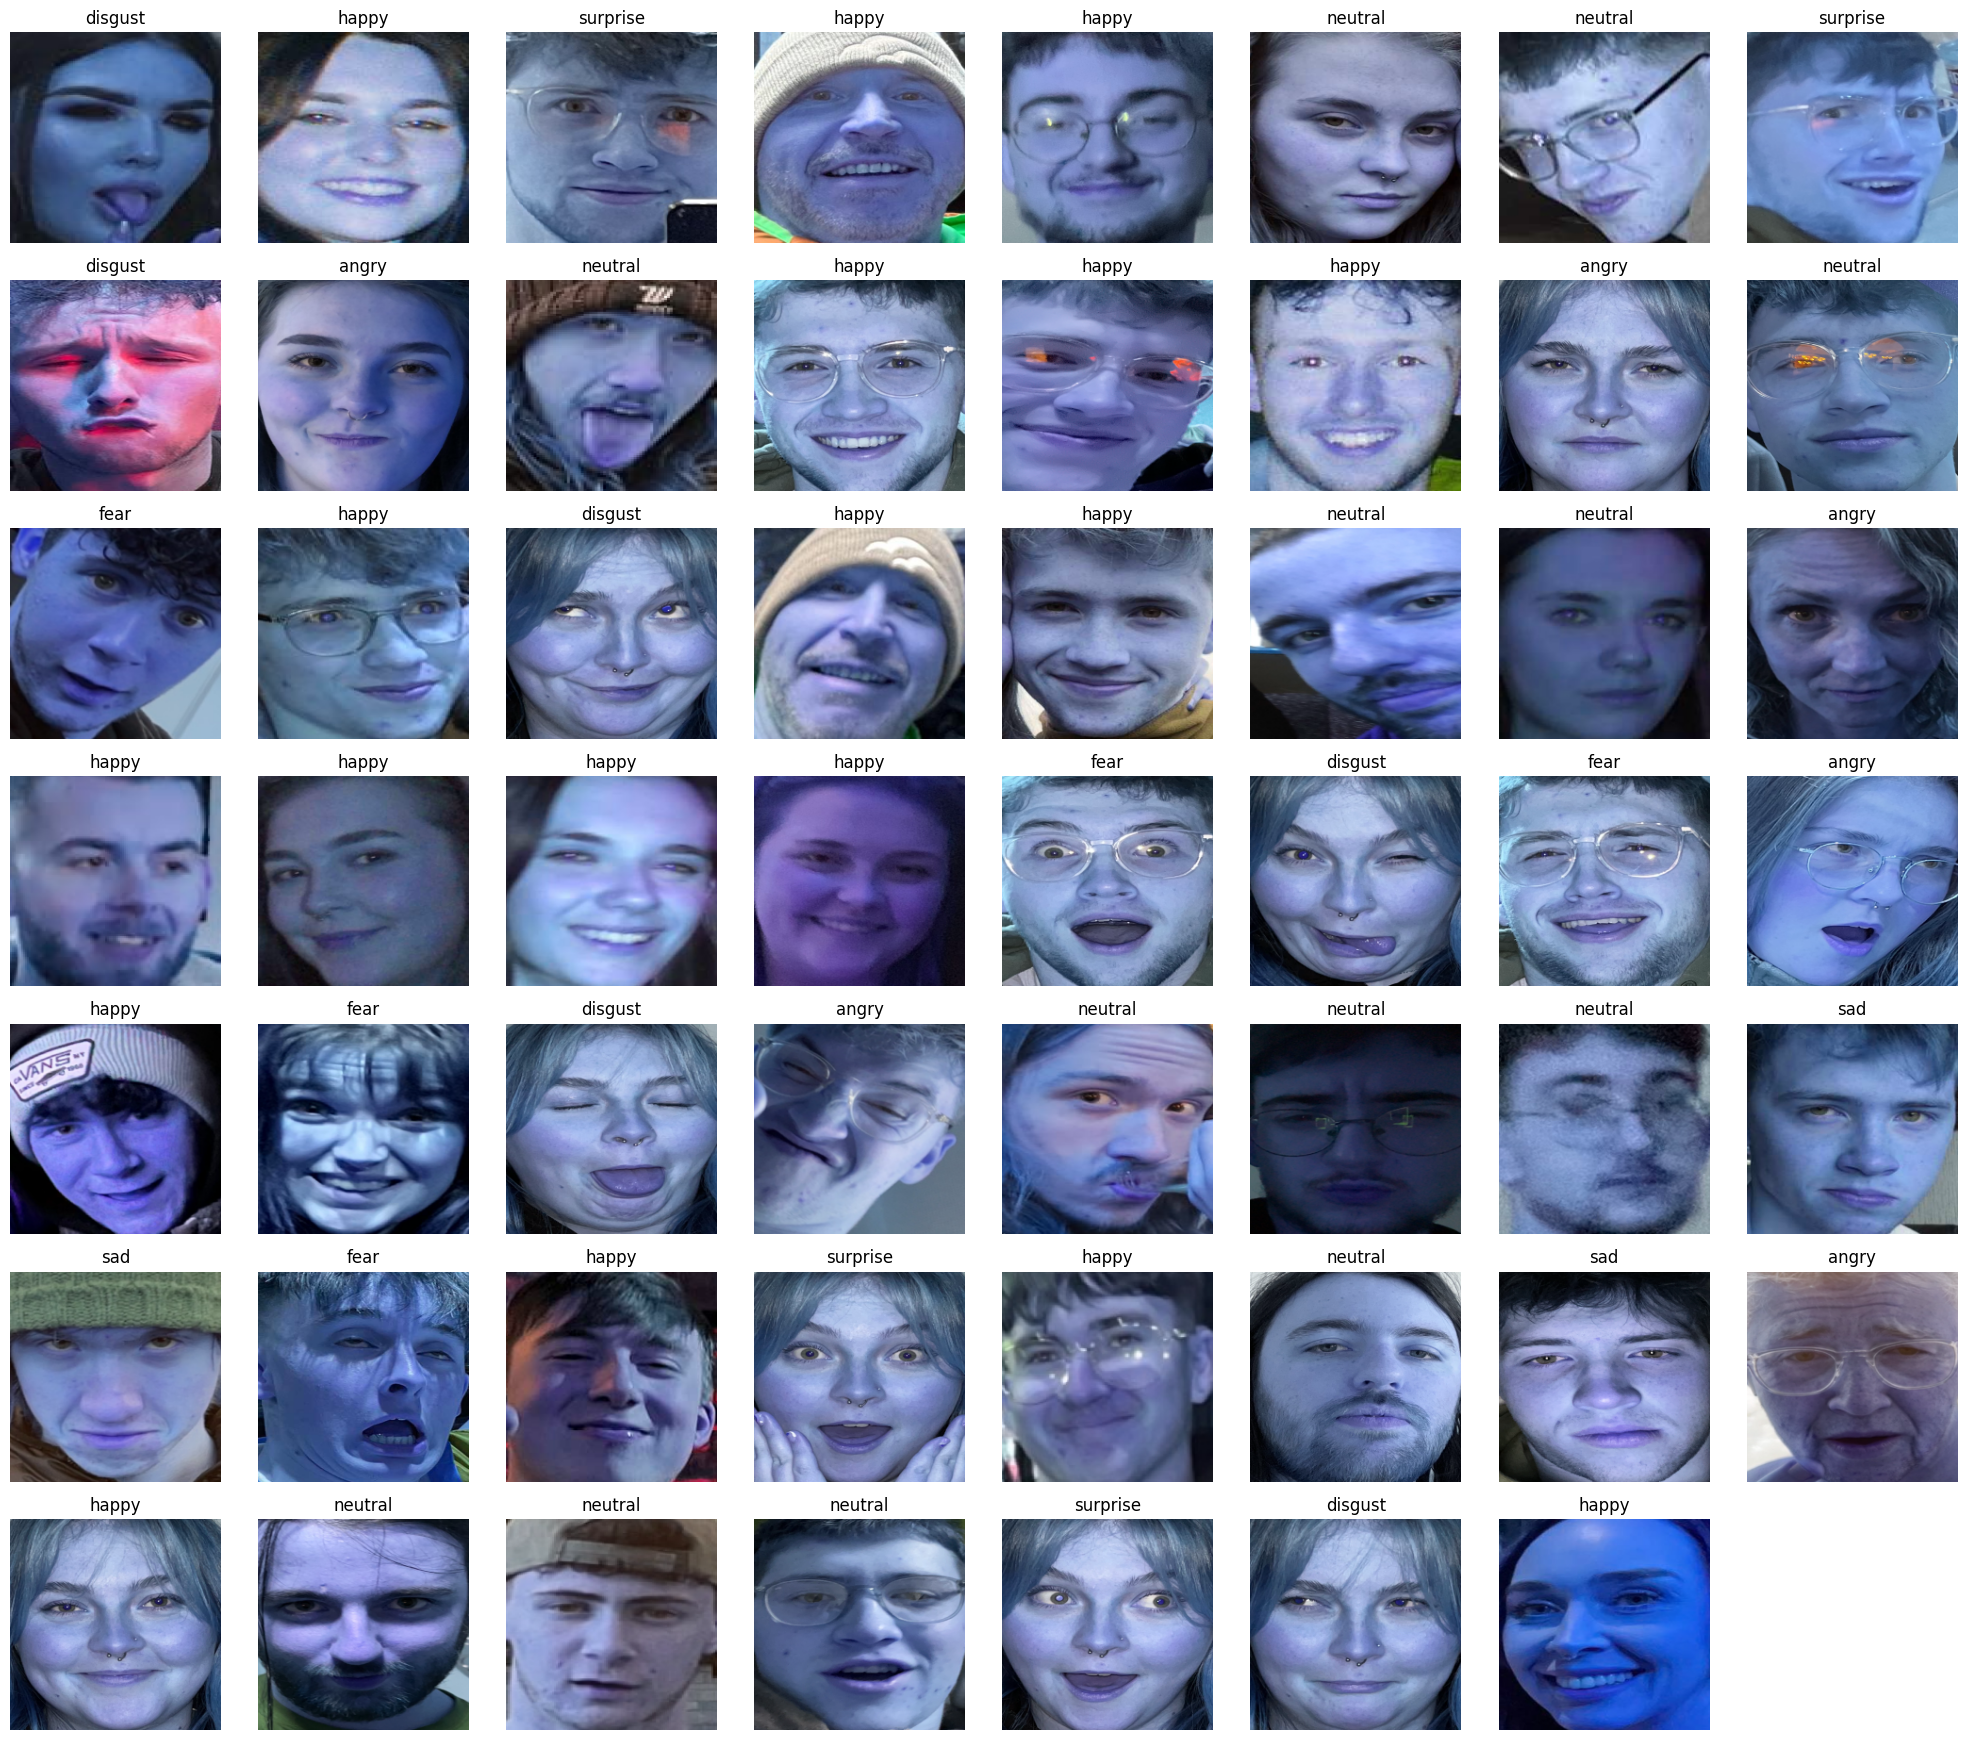

In [ ]:
def getLabel(label: int) -> str:
    label_map = {
        0: 'angry',
        1: 'disgust',
        2: 'fear',
        3: 'happy',
        4: 'neutral',
        5: 'sad',
        6: 'surprise'
    }
    return label_map.get(label, 'unknown')  # 'unknown' is fallback for invalid labels


# Settings
images_per_row = 8
num_images = len(images)
num_rows = (num_images + images_per_row - 1) // images_per_row  # Ceiling division

# Create subplots
fig, axes = plt.subplots(num_rows, images_per_row, figsize=(20, num_rows * 2.5))

# Flatten axes for easy indexing
axes = axes.flatten()

for i in range(len(images)):
    axes[i].imshow(images[i])
    axes[i].set_title((getLabel(labels[i])))
    axes[i].axis('off')

# Hide any unused subplots
for i in range(len(images), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# shape of current

np_images = np.array(images)
np_labels = np.array(labels)

print(np_images.shape)
print(np_labels.shape)

(55, 224, 224, 3)
(55,)


In [ ]:
# Save Data set
import h5py

with h5py.File('face_rec_additions.hdf5', 'w') as f:
    X_train_dataset = f.create_dataset('X_train', data=np_images)
    y_train_dataset = f.create_dataset('y_train', data=np_labels)


<ipython-input-167-be1b85e89a22>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45)


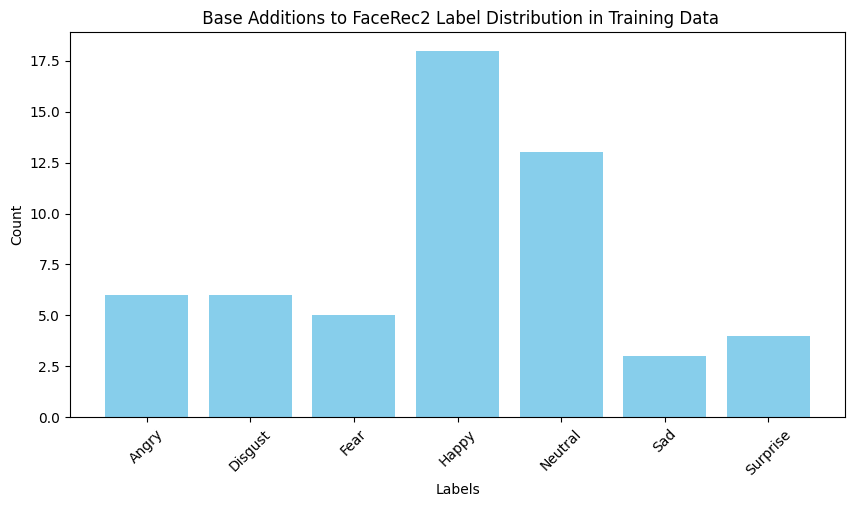

In [ ]:
# plot data
from collections import Counter
def plotLabelBar(y_test, labels, title):
    #y_train = np.argmax(y_train, axis=1)  # Convert one-hot encoding to label indices
    label_counts = Counter(y_test)  # Count occurrences of each label

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.bar(labels, [label_counts[i] for i in range(len(labels))], color='skyblue')
    ax.set_xlabel("Labels")
    ax.set_ylabel("Count")
    ax.set_title(f" {title} Label Distribution in Training Data")
    ax.set_xticklabels(labels, rotation=45)

    plt.show()

plotLabelBar(labels, ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"], 'Base Additions to FaceRec2')


In [ ]:
# Clear all Values
np_images = []
np_labels = []
images = []
labels = []
index = 0

# Import FaceRec2 and get Label Distrobution

In [ ]:
facerec_path = 'drive/MyDrive/Experiment_With_Code/AI/import_faceRec3/facerec_train.h5'
facerec_addition = 'drive/MyDrive/Experiment_With_Code/AI/import_faceRec3/face_rec_additions.hdf5'

with h5py.File(facerec_path, 'r') as f:
    y_train = f['y_train'][:]


with h5py.File(facerec_addition, 'r') as f:
    additional_labels = f['y_train'][:]

# Label Distro with Additions

<ipython-input-167-be1b85e89a22>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45)


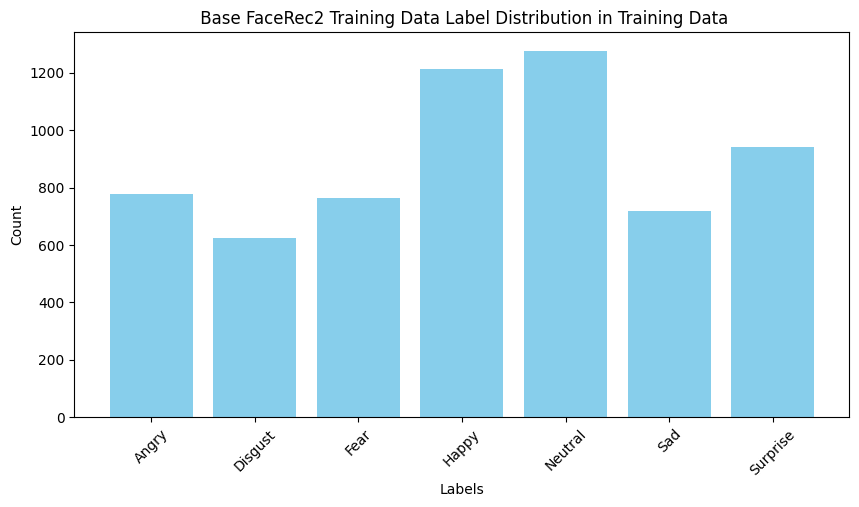

<ipython-input-167-be1b85e89a22>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45)


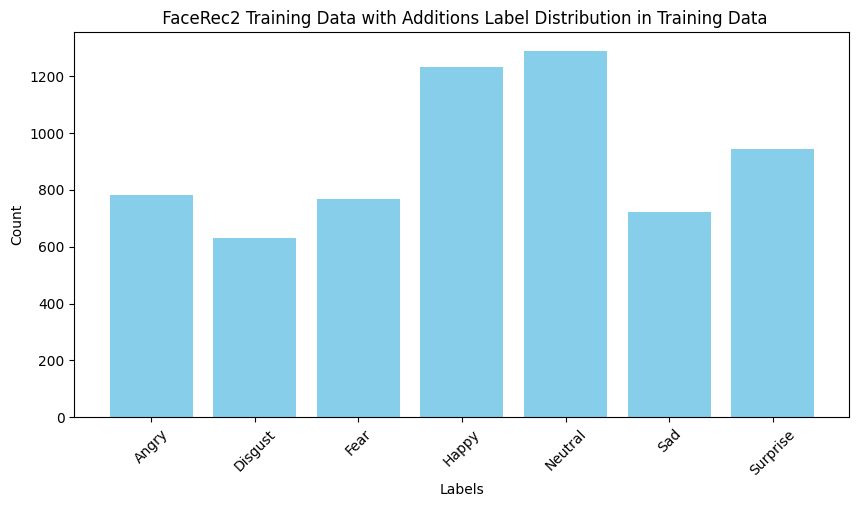

In [ ]:
plotLabelBar(y_train, ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"], "Base FaceRec2 Training Data")


faceRecV3Labels = np.concatenate((y_train, additional_labels))
plotLabelBar(faceRecV3Labels, ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"], "FaceRec2 Training Data with Additions")